# Statistiques de notre population 

## Match vs Non Match

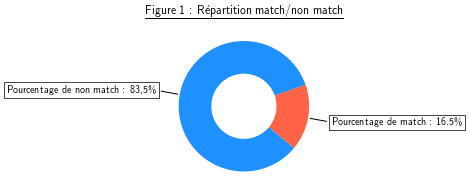

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels =['Pourcentage de match : 16.5\%','Pourcentage de non match : 83,5\%']

match =[len(df[df['match']==1])/len(df),len(df[df['match']==0])/len(df)]

wedges, texts = ax.pie(match, wedgeprops=dict(width=0.5), colors=['tomato','dodgerblue'], startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title(r'\underline{Figure 1 : Répartition match/non match}')
plt.show()
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")

/Users/corentincorcelette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


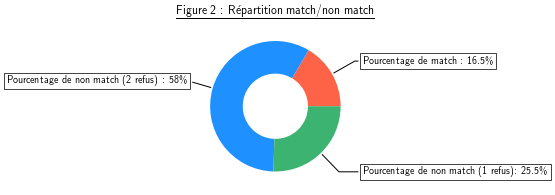

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels =['Pourcentage de match : 16.5\%','Pourcentage de non match (2 refus) : 58\%','Pourcentage de non match (1 refus): 25.5\%']

match =[len(df[df['match']==1])/len(df),df[df.match==0][df.dec_o==0].shape[0]/df.shape[0],(df.dec_o.sum()- df.match.sum())/df.shape[0]]

wedges, texts = ax.pie(match, wedgeprops=dict(width=0.5), colors=['tomato','dodgerblue','mediumseagreen'], startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title(r'\underline{Figure 2 : Répartition match/non match}')
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")

## Homme vs Femme

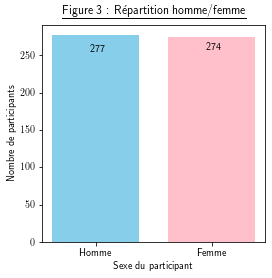

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df['gender'].value_counts()
value1= df['gender'].value_counts()[0]
value2= df['gender'].value_counts()[1]
value = [value1,value2]
sexe = ['Homme','Femme']
sexe1 = [0,1]
plt.figure(figsize=(4, 4))
plt.bar(sexe[0], value[1],color='skyblue',width=0.75)
plt.bar(sexe[1],value[0],color='pink',width=0.75)
plt.xlabel('Sexe du participant')
plt.ylabel('Nombre de participants')
plt.title(r"\underline{Figure 3 : Répartition homme/femme}")
label = ['277    ', '274']
# Text on the top of each barplot
for i in range(len(sexe)):
 plt.text(x = sexe1[i]-0.05, y = value[i]-20, s = label[i], size = 10)

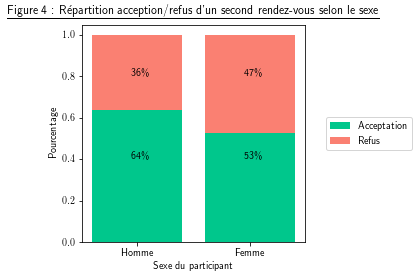

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df['gender'] = df['gender'].apply(lambda x :
                              "Femme" if x==0
                              else "Homme"
                             )
gender = df.groupby('gender')['dec_o'].value_counts()
Idmatch1 =  gender[3]/(gender[3] + gender[2])
Idmatch0 = gender[1]/(gender[1] + gender[0])
Diffmatch1 = gender[2]/(gender[2] + gender[3])
Diffmatch0 = gender[0]/(gender[0] + gender[1])
rapport1 = [Idmatch1,Idmatch0]
rapport2 = [Diffmatch1,Diffmatch0]
legend = ["Homme",'Femme']
legend1 = [0,1]
legend2 = [0,1]
plt.figure(figsize=(4,4))
plt.bar(legend, rapport2, label="Femme",color=['#00C78C'])
plt.bar(legend, rapport1, bottom=rapport2,label="Homme",color=['salmon'])
plt.ylabel('Pourcentage')
plt.xlabel('Sexe du participant')
plt.title(r"\underline{Figure 4 : Répartition acception/refus d'un second rendez-vous selon le sexe}")
plt.legend(['Acceptation','Refus'], loc='center right', bbox_to_anchor=(1.5, 0.5))
label1 = ['64\%', '53\%']
label2 = ['36\%','47\%']
# Text on the top of each barplot
for i in range(len(legend)):
 plt.text(x = legend1[i]-0.05, y = 0.4, s = label1[i], size = 10)
 plt.text(x = legend1[i]-0.05, y = 0.8, s = label2[i], size = 10)

## Age

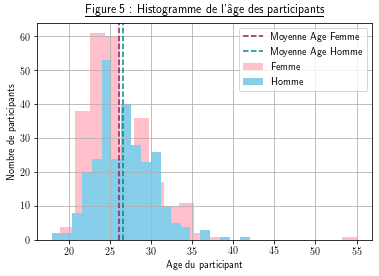

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df1 = df[df['gender']==0]
df2 = df[df['gender']==1]
plt.hist(df1['age'], bins=20,facecolor='pink',alpha=1)
plt.hist(df2['age'], bins=20,facecolor='skyblue',alpha=1)
plt.grid(True)
plt.xlabel('Age du participant')
labels=['Moyenne Age Femme','Moyenne Age Homme','Femme','Homme']
plt.ylabel('Nombre de participants')
plt.axvline(x=26.1,color='#8B2252',linestyle='--')
plt.axvline(x=26.6,color='#00868B',linestyle='--')
plt.legend(labels)
plt.title(r"\underline{Figure 5 : Histogramme de l'âge des participants}")
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")

## Race

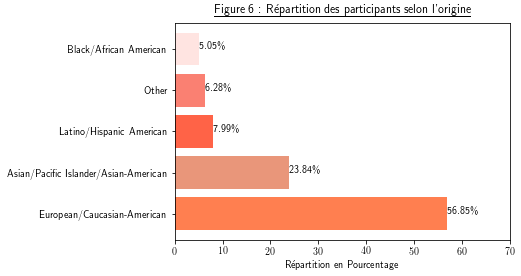

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df.race = df.race.apply(lambda x :
                              "Black/African American" if x==1
                              else "European/Caucasian-American" if x==2
                              else "Latino/Hispanic American" if x==3
                              else "Asian/Pacific Islander/Asian-American" if x==4
                              else "Native American" if x==5
                              else "Other" if x==6  
                              else "NAN"
                             )
race = df.race.value_counts()

s = np.sum(race.values[:-1])
repartition = [np.round(element/s*100,2) for element in race.values[:-1]]
repartition
plt.title(r"\underline{Figure 6 : Répartition des participants selon l'origine}")
plt.barh(race.index[:-1],repartition,color=['coral', 'darksalmon', 'tomato', 'salmon', 'mistyrose'])
plt.xlabel("Répartition en Pourcentage")
plt.xlim(0,70)

for i in range(len(repartition)):
  plt.text(repartition[i], race.index[:-1][i],'{}\%'.format(repartition[i]))

## Secteur d'activité

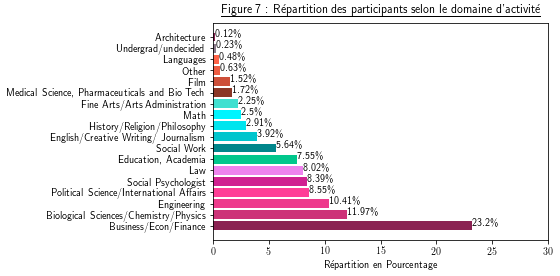

In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df.field_cd = df.field_cd.apply(lambda x :
                              "Law" if x==1
                              else "Math" if x==2
                              else "Social Psychologist" if x==3
                              else "Medical Science, Pharmaceuticals and Bio Tech" if x==4
                              else "Engineering" if x==5
                              else "English/Creative Writing/ Journalism" if x==6  
                              else "History/Religion/Philosophy" if x==7
                              else "Business/Econ/Finance" if x==8
                              else "Education, Academia" if x==9
                              else "Biological Sciences/Chemistry/Physics" if x==10
                              else "Social Work" if x==11
                              else "Undergrad/undecided" if x==12
                              else "Political Science/International Affairs" if x==13
                              else "Film" if x==14
                              else "Fine Arts/Arts Administration" if x==15
                              else "Languages" if x==16
                              else "Architecture" if x==17
                              else "Other" if x==18
                              else "NAN"
                             )
field = df.field_cd.value_counts()
del field['NAN']
s = np.sum(field.values[:])
repartition = [np.round(element/s*100,2) for element in field.values[:]]
plt.title(r"\underline{Figure 7 : Répartition des participants selon le domaine d'activité}")
plt.barh(field.index[:],repartition, color=['#8B2252','#CD3278','#EE3A8C','#FF3E96','#D02090','#EE82EE','#00C78C','#00868B','#00C5CD','#00E5EE','#00F5FF','#40E0D0','#8B3626','#CD4F39','#EE5C42','#FF6347','#8B7B8B'])
plt.xlabel("Répartition en Pourcentage")
plt.xlim(0,30)

for i in range(len(repartition)):
 plt.text(repartition[i], field.index[:][i],'{}\%'.format(repartition[i]))

# Répartition match/non match 

## Selon la Race identique ou différente des participants

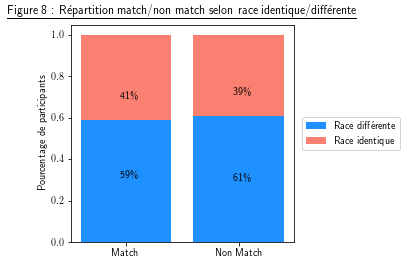

In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df['race'] = df['race']-df['race_o']
df['race'] = df['race'].apply(lambda x :
                              "Race identique" if x==0
                              else "Race différente"
                             )
race = df.groupby('race')['match'].value_counts()
Idmatch1 =  race[3]/(race[3] + race[1])
Idmatch0 = race[2]/(race[2] + race[0])
Diffmatch1 = race[1]/(race[1] + race[3])
Diffmatch0 = race[0]/(race[0] + race[2])
rapport1 = [Idmatch1,Idmatch0]
rapport2 = [Diffmatch1,Diffmatch0]
legend = ["Match",'Non Match']
legend1 = [0,1]
legend2 = [0,1]
plt.figure(figsize=(4,4))
plt.bar(legend, rapport2, label="Race identique",color=['dodgerblue'])
plt.bar(legend, rapport1, bottom=rapport2,label="Race différente",color=['salmon'])
plt.ylabel('Pourcentage de participants')
plt.title(r"\underline{Figure 8 : Répartition match/non match selon race identique/différente}")
plt.legend(['Race différente','Race identique'], loc='center right', bbox_to_anchor=(1.5, 0.5))
label1 = ['59\%', '61\%']
label2 = ['41\%','39\%']
# Text on the top of each barplot
for i in range(len(legend)):
 plt.text(x = legend1[i]-0.05, y = rapport1[i]-0.1, s = label1[i], size = 10)
 plt.text(x = legend1[i]-0.05, y = rapport2[i]+0.1, s = label2[i], size = 10)

## Selon la Différence d'Age entre les participants

<Figure size 288x288 with 0 Axes>

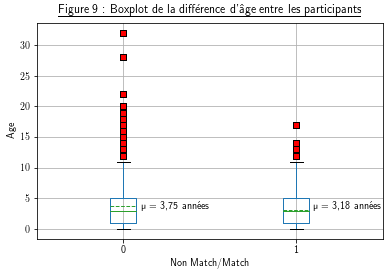

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df['age'] = abs(df['age']-df['age_o'])
plt.figure(figsize=(4,4))
red_square = dict(markerfacecolor='r', marker='s')
df.boxplot(column='age', by='match',meanline=True,showmeans=True,flierprops=red_square)
plt.title(r"\underline{Figure 9 : Boxplot de la différence d'âge entre les participants}")
plt.suptitle('') # that's what you're after
plt.xlabel("Non Match/Match")
plt.ylabel('Age')
label = ['µ = 3,75 années', 'µ = 3,18 années']
for i in range(len(legend)):
 plt.text(x = legend1[i]+1.1, y = rapport1[i]+3, s = label[i], size = 10)

## Selon les Activités des participants

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
proportion = df.groupby('iid')['match'].sum()
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df = df.merge(proportion[:], left_on='iid', right_on='iid')
df['match_yp'] = df['match_y']/df['round']
df['nonmatch'] = df['round'] - df['match_y']
df['total'] = df['nonmatch'] + df['match_y']
df = df.dropna(subset=['exphappy'])
df = df.dropna(subset=['expnum'])
data = df[['match_yp','dining','tvsports','museums','art','hiking','gaming','clubbing','reading','tv','theater','concerts','movies','music','yoga']]
corr =data.corr()
corr.style.background_gradient(cmap=('coolwarm')).set_precision(2)

,match_yp,dining,tvsports,museums,art,hiking,gaming,clubbing,reading,tv,theater,concerts,movies,music,yoga
match_yp,1,0.13,-0.067,-0.0093,0.082,-0.0071,-0.031,0.32,0.0059,-0.06,-0.03,0.24,0.11,0.24,0.2
dining,0.13,1,-0.21,0.41,0.38,0.18,-0.0062,0.3,0.034,0.034,0.42,0.38,0.27,0.3,0.34
tvsports,-0.067,-0.21,1,-0.19,-0.24,0.021,0.31,0.095,-0.13,0.12,-0.36,-0.12,-0.14,-0.11,-0.1
museums,-0.0093,0.41,-0.19,1,0.88,0.2,-0.037,0.17,0.39,-0.091,0.62,0.43,0.24,0.14,0.34
art,0.082,0.38,-0.24,0.88,1,0.16,-0.068,0.19,0.34,-0.083,0.6,0.44,0.21,0.22,0.37
hiking,-0.0071,0.18,0.021,0.2,0.16,1,0.19,0.032,0.036,-0.15,0.069,0.19,-0.026,-0.062,0.25
gaming,-0.031,-0.0062,0.31,-0.037,-0.068,0.19,1,0.25,-0.061,0.08,-0.086,-0.023,-0.057,-0.066,-0.064
clubbing,0.32,0.3,0.095,0.17,0.19,0.032,0.25,1,0.013,-0.021,0.22,0.23,0.11,0.23,0.24
reading,0.0059,0.034,-0.13,0.39,0.34,0.036,-0.061,0.013,1,-0.073,0.28,0.075,0.15,0.088,0.12
tv,-0.06,0.034,0.12,-0.091,-0.083,-0.15,0.08,-0.021,-0.073,1,0.072,0.048,0.27,0.12,-0.039


## Selon le Revenu des participants

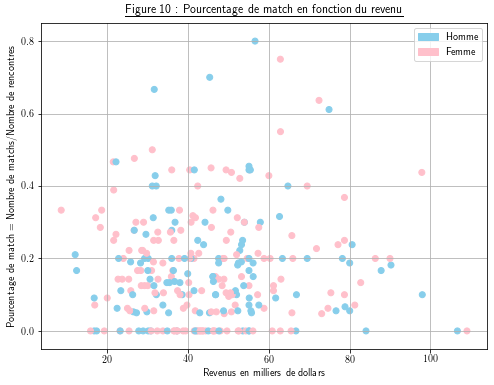

In [603]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
proportion = df.groupby('iid')['match'].sum()
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df = df.merge(proportion[:], left_on='iid', right_on='iid')
df['match_yp'] = df['match_y']/df['round']
df['nonmatch'] = df['round'] - df['match_y']
df['match_np'] = df['nonmatch']/df['round']
df = df.dropna(subset=['income'])
df['income'] = [x.replace(',', '.') for x in df['income']] 
df['income'] = df.income.apply(lambda x: x[:-3])
df['income'] = df.income.astype(float)
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
categories = np.array(df.gender)
colormap = np.array(['pink', 'skyblue'])
plt.scatter(df['income'],df['match_yp'], c=colormap[categories])
pop_a = mpatches.Patch(color='skyblue', label='Homme')
pop_b = mpatches.Patch(color='pink', label='Femme')
plt.legend(handles=[pop_a,pop_b])
plt.title(r"\underline{Figure 10 : Pourcentage de match en fonction du revenu}")
plt.xlabel('Revenus en milliers de dollars')
plt.ylabel('Pourcentage de match = Nombre de matchs/Nombre de rencontres')
plt.grid(True)

## Selon l'Objectif des participants

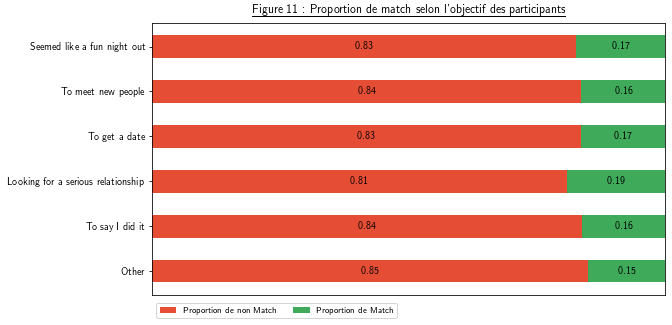

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df = df.merge(proportion[:], left_on='iid', right_on='iid')
df['match_yp'] = df['match_y']/df['round']
df['nonmatch'] = df['round'] - df['match_y']
df['match_np'] = df['nonmatch']/df['round']
df.goal.astype('category')
df = df.dropna(subset=['goal'])
match = df.groupby('goal')['match_yp'].mean()
nonmatch = df.groupby('goal')['match_np'].mean()
category_names = ['Proportion de non Match', 'Proportion de Match']
results = {
    'Seemed like a fun night out': [nonmatch[1],match[1]],
    'To meet new people': [nonmatch[2],match[2]],
    'To get a date': [nonmatch[3],match[3]],
    'Looking for a serious relationship': [nonmatch[4],match[4]],
    'To say I did it': [nonmatch[5],match[5]],
    'Other': [nonmatch[6],match[6]]
}
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title(r"\underline{Figure 11 : Proportion de match selon l'objectif des participants}")

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        g, b, r, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, round(c,2), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, -0.1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

## Selon la Profession des participants

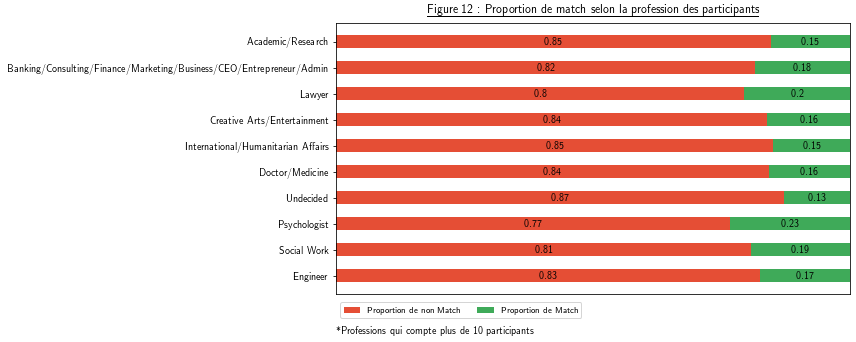

In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df = df.merge(proportion[:], left_on='iid', right_on='iid')
df['match_yp'] = df['match_y']/df['round']
df['nonmatch'] = df['round'] - df['match_y']
df['match_np'] = df['nonmatch']/df['round']
df.career_c.astype('category')
df = df.dropna(subset=['career_c'])
match = df.groupby('career_c')['match_yp'].mean()
nonmatch = df.groupby('career_c')['match_np'].mean()
category_names = ['Proportion de non Match', 'Proportion de Match']
results = {
    'Academic/Research': [nonmatch[2],match[2]],
    'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin': [nonmatch[7],match[7]],
    'Lawyer': [nonmatch[1],match[1]],
    'Creative Arts/Entertainment': [nonmatch[6],match[6]],
    'International/Humanitarian Affairs': [nonmatch[9],match[9]],
    'Doctor/Medicine': [nonmatch[4],match[4]],
    'Undecided': [nonmatch[10],match[10]],
    'Psychologist': [nonmatch[3],match[3]],
    'Social Work': [nonmatch[11],match[11]],
    'Engineer': [nonmatch[5],match[5]]
}
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title(r"\underline{Figure 12 : Proportion de match selon la profession des participants}")

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        g, b, r, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, round(c,2), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, -0.1),
              loc='lower left', fontsize='small')
    ax.text(0,11.2, '*Professions qui compte plus de 10 participants')

    return fig, ax

survey(results, category_names)
plt.show()

## Selon la taille du groupe

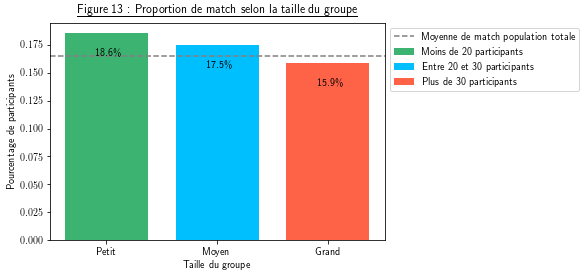

In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
proportion = df.groupby('iid')['match'].sum()
df = df.drop_duplicates(subset=['iid','wave'], keep='first')
df = df.merge(proportion[:], left_on='iid', right_on='iid')
df['match_yp'] = df['match_y']/df['round']
df['nonmatch'] = df['round'] - df['match_y']
df['match_np'] = df['nonmatch']/df['round']
wave = df.groupby('wave')['round'].sum()
wave = wave.apply(lambda x :
                              "Moins ou égal 100 rendez-vous" if x<200
                              else "Plus ou égale à 300 rendez vous" if x>600
                              else "Entre 100 et 300 rendez-vous"
                             )
match = df.groupby('wave')['match_y'].sum()/df.groupby('wave')['round'].sum()
a = (match[5]+match[6]+match[10]+match[13]+match[16]+match[18]+match[20])/7
b = (match[1]+match[3]+match[7]+match[8]+match[12]+match[17]+match[19])/7
c = (match[2]+match[4]+match[9]+match[11]+match[14]+match[15]+match[21])/7
proportion = [a,b,c]
label = ['Petit', 'Moyen', 'Grand']
fig, ax = plt.subplots()
plt.bar(label[0], proportion[0],color='mediumseagreen',width=0.75)
plt.bar(label[1],proportion[1],color='deepskyblue',width=0.75)
plt.bar(label[2], proportion[2],color='tomato',width=0.75)
plt.title(r"\underline{Figure 13 : Proportion de match selon la taille du groupe}")
plt.xlabel('Taille du groupe')
plt.ylabel('Pourcentage de participants')
plt.axhline(y=0.165,color='gray',linestyle='--')
plt.legend(['Moyenne de match population totale','Moins de 20 participants','Entre 20 et 30 participants','Plus de 30 participants'],bbox_to_anchor=(1, 1))
valeur = ['18.6\%','17.5\%','15.9\%']
x1 = [0,1,2]
for i in range(len(label)):
 plt.text(x = x1[i]-0.1, y = proportion[i]-0.02, s = valeur[i], size = 10)

## Selon l'ordre des rencontres

/Users/corentincorcelette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/corentincorcelette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


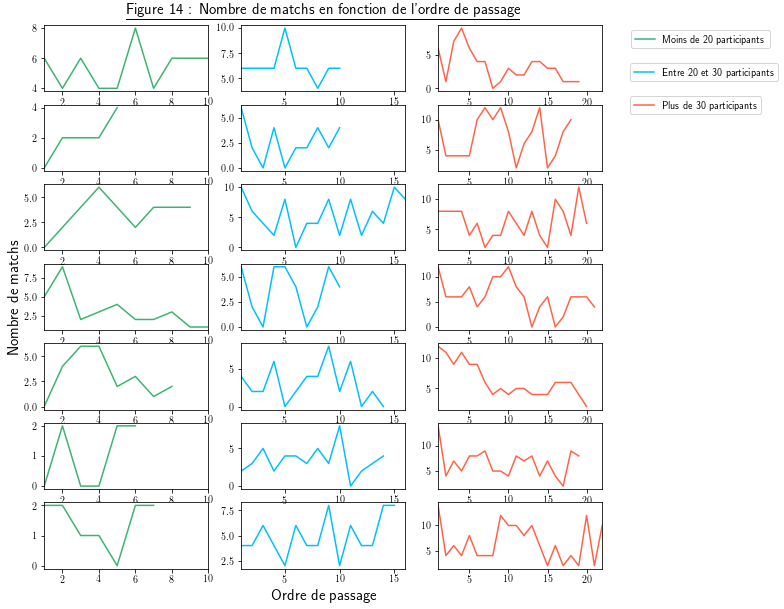

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv',encoding = 'unicode_escape')
plt.rc('text', usetex=True)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(7,3,10)
ax.set_ylabel('Nombre de matchs',size=15)
ax = fig.add_subplot(7,3,20)
ax.set_xlabel('Ordre de passage',size=15)

plt.subplot(7,3,2)
plt.title(r"\underline{Figure 14 : Nombre de matchs en fonction de l'ordre de passage}",size=15)
plt.xlim(1, 16)
plt.plot(df[df.wave==1].groupby('order')['match'].sum(),color='deepskyblue')
plt.legend(['Entre 20 et 30 participants'],bbox_to_anchor=(3.3, 0.5))

plt.subplot(7,3,3)
plt.xlim(1, 22)
plt.plot(df[df.wave==2].groupby('order')['match'].sum(),color='tomato')
plt.legend(['Plus de 30 participants'],bbox_to_anchor=(2, 0))

plt.subplot(7,3,5)
plt.xlim(1, 16)
plt.plot(df[df.wave==3].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,6)
plt.xlim(1, 22)
plt.plot(df[df.wave==4].groupby('order')['match'].sum(),color='tomato')

plt.subplot(7,3,1)
plt.xlim(1, 10)
plt.plot(df[df.wave==5].groupby('order')['match'].sum(),color='mediumseagreen')
plt.legend(['Moins de 20 participants'],bbox_to_anchor=(4.45, 1))

plt.subplot(7,3,4)
plt.xlim(1, 10)
plt.plot(df[df.wave==6].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,8)
plt.xlim(1, 16)
plt.plot(df[df.wave==7].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,11)
plt.xlim(1, 16)
plt.plot(df[df.wave==8].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,9)
plt.xlim(1, 22)
plt.plot(df[df.wave==9].groupby('order')['match'].sum(),color='tomato')

plt.subplot(7,3,7)
plt.xlim(1, 10)
plt.plot(df[df.wave==10].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,12)
plt.xlim(1, 22)
plt.plot(df[df.wave==11].groupby('order')['match'].sum(),color='tomato')

plt.subplot(7,3,14)
plt.xlim(1, 16)
plt.plot(df[df.wave==12].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,10)
plt.xlim(1, 10)
plt.plot(df[df.wave==13].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,15)
plt.xlim(1, 22)
plt.plot(df[df.wave==14].groupby('order')['match'].sum(),color='tomato')

plt.subplot(7,3,18)
plt.xlim(1, 22)
plt.plot(df[df.wave==15].groupby('order')['match'].sum(),color='tomato')

plt.subplot(7,3,13)
plt.xlim(1, 10)
plt.plot(df[df.wave==16].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,17)
plt.xlim(1, 16)
plt.plot(df[df.wave==17].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,16)
plt.xlim(1, 10)
plt.plot(df[df.wave==18].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,20)
plt.xlim(1, 16)
plt.plot(df[df.wave==19].groupby('order')['match'].sum(),color='deepskyblue')

plt.subplot(7,3,19)
plt.xlim(1, 10)
plt.plot(df[df.wave==20].groupby('order')['match'].sum(),color='mediumseagreen')

plt.subplot(7,3,21)
plt.xlim(1, 22)
plt.plot(df[df.wave==21].groupby('order')['match'].sum(),color='tomato')
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")